In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_optimization_results(df):
    plt.style.use('default')

    fig, ax = plt.subplots(figsize=(10, 8))
    fig.suptitle('EV Charging Station Optimization Combined Metrics', fontsize=16)

    metrics = ['coverage_trip', 'coverage_register', 'coverage_outage']
    colors = ['blue', 'green', 'red', 'cyan', 'magenta']  
    markers = ['o', 's', '^'] 

    for j, max_dist in enumerate(df['max_dist'].unique()):
        data = df[df['max_dist'] == max_dist]
        for k, metric in enumerate(metrics):
            ax.plot(data['n_facilities'], data[metric], 
                    marker=markers[k], linestyle=['-', '--', ':'][k], 
                    color=colors[j % len(colors)],
                    label=f'{metric.replace("_", " ").title()} (Max Dist: {max_dist})')

    ax.set_xlabel('Number of Facilities')
    ax.set_ylabel('Coverage (%)')
    ax.set_title('Comparison of Coverage Metrics by Number of Facilities')
    ax.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.savefig('ev_optimization_all_metrics.png', dpi=300, bbox_inches='tight')
    plt.show()

In [3]:
df = pd.read_csv("demand_coverage_3_indicators.csv")

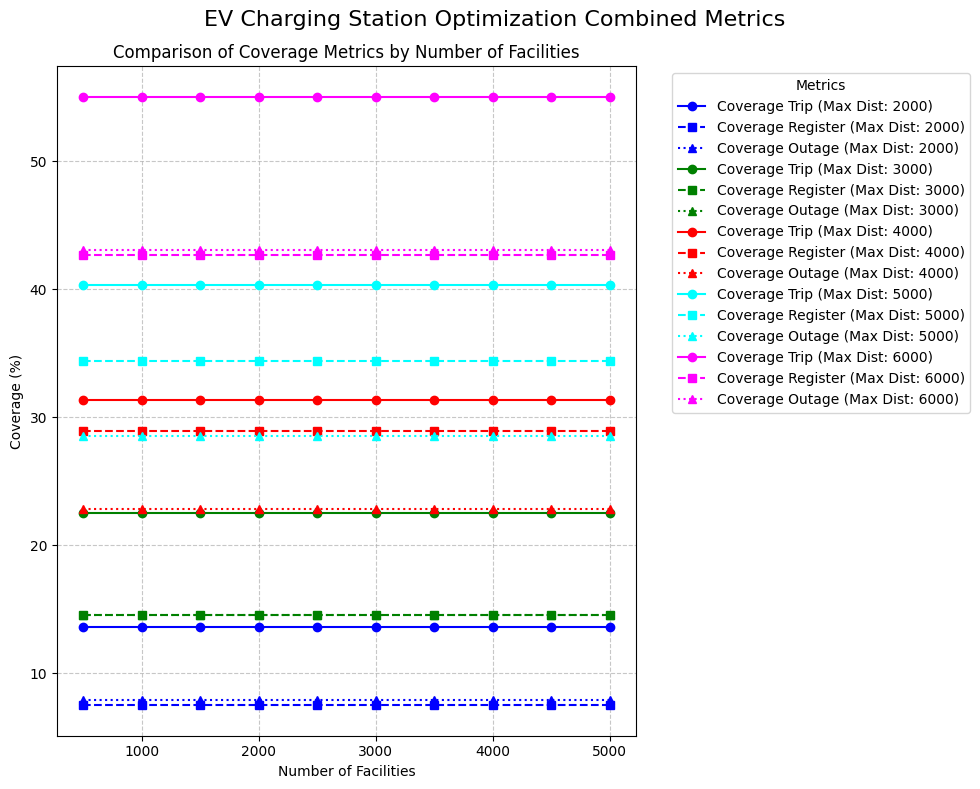

In [4]:
plot_optimization_results(df)

In [5]:
def plot_average_metrics(df):
    plt.style.use('default')
    
    metrics = ['coverage_trip', 'coverage_register', 'coverage_outage']
    colors = ['blue', 'green', 'red', 'purple', 'orange']
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6))
    fig.suptitle('EV Charging Station Optimization - Average Metrics by Max Distance', fontsize=16)
    
    for i, metric in enumerate(metrics):
        avg_data = df.groupby('max_dist')[metric].mean().reset_index()
        
        axs[i].plot(avg_data['max_dist'], avg_data[metric], 
                    marker='o', linestyle='-', color=colors[i],
                    linewidth=2, markersize=8)
        
        axs[i].set_xlabel('Max Distance')
        axs[i].set_ylabel('Average Coverage (%)')
        axs[i].set_title(f'Average {metric.replace("_", " ").title()}')
        axs[i].grid(True, linestyle='--', alpha=0.7)
        for x, y in zip(avg_data['max_dist'], avg_data[metric]):
            axs[i].annotate(f'{y:.2f}%', (x, y), textcoords="offset points", 
                            xytext=(0,10), ha='center')

        axs[i].set_ylim(bottom=0)
    
    plt.tight_layout()
    plt.savefig('ev_optimization_average_metrics.png', dpi=300, bbox_inches='tight')
    plt.show()

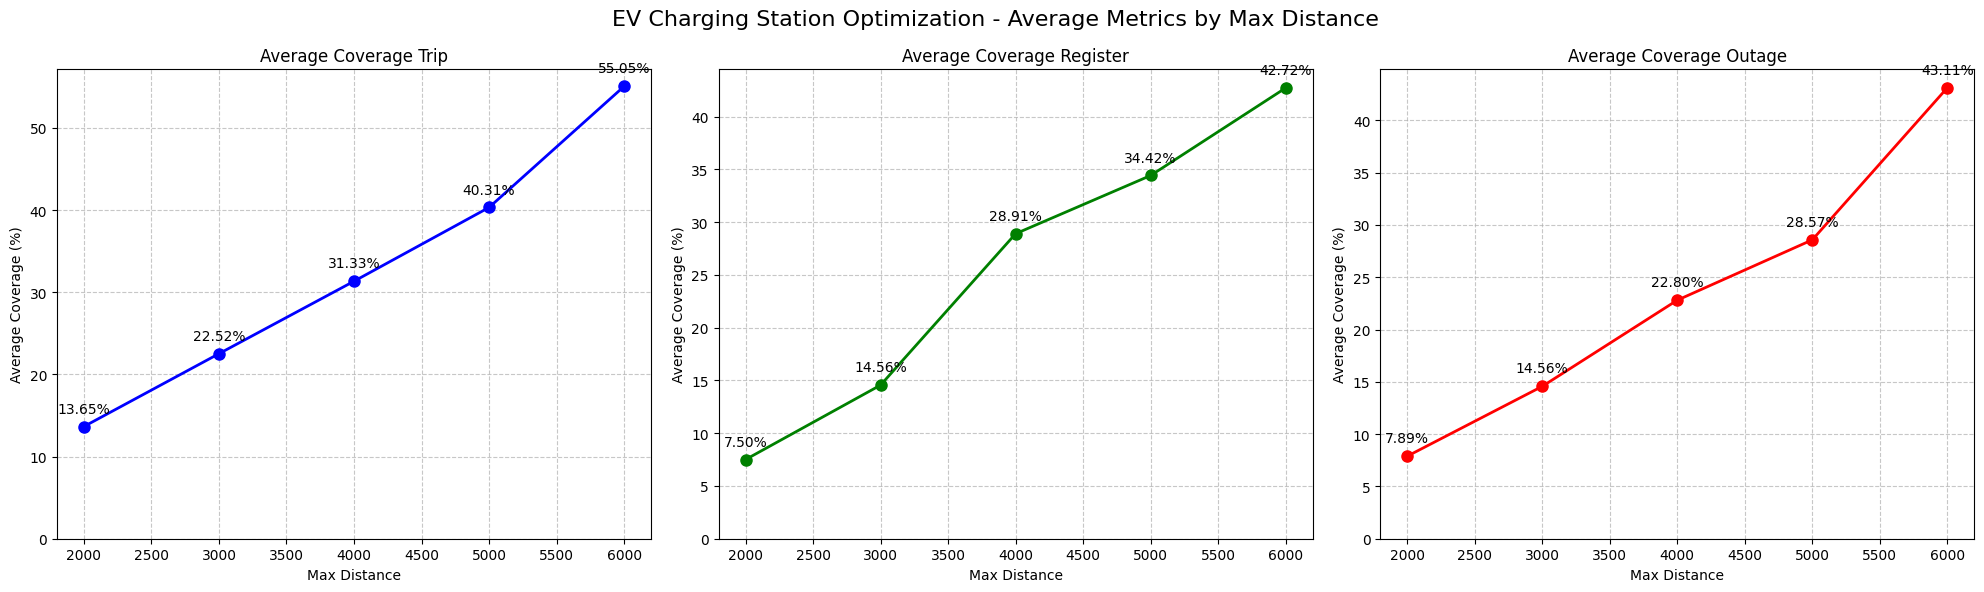

In [6]:
plot_average_metrics(df)